<a href="https://colab.research.google.com/github/jcardon/JNotebook/blob/master/bimbo_fraud_det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Leemos nuestros archivos:


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Aperturas.csv to Aperturas (1).csv
Saving Movtos_Ctas_2015.csv to Movtos_Ctas_2015 (1).csv


Librerias necesarias:


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime


%matplotlib inline


In [0]:
df_aperturas = pd.read_csv('Aperturas.csv')
df_mov = pd.read_csv('Movtos_Ctas_2015.csv',encoding='latin-1')

In [4]:
df_aperturas.head(5)

,Numero_de_cuenta,Monto_de_apertura,Fecha_Apertura,Cliente,Tipo_de_Instrumento
0,00MH985399,16046.40,3/6/2014,100540012,Cuenta corriente
1,00CU982321,379072.47,11/24/2014,100540013,Cuenta corriente
2,00CU982323,1603.86,2/12/2013,100540014,Cuenta corriente
3,00CU982324,3207.72,2/19/2013,100540015,Cuenta corriente
4,00CU982509,880377.46,9/9/2013,100540016,Cuenta corriente


In [5]:
df_mov.head(5)

,Numero_de_cuenta,Monto_transacción,Sucursal_nombre,Fecha_Transaccion,Hora_transaccion,Tipo_de_Transacción,Operador,Referencia
0,00BJ987645,409.29,BENITO JUÁREZ,6/15/2015,02:56:08 a. m.,DEFE,BJ1037,3064980
1,00BJ961410,525.00,BENITO JUÁREZ,6/10/2015,02:56:08 a. m.,RECJ,BJ1037,3064981
2,00BJ962496,1114475.13,BENITO JUÁREZ,5/27/2015,02:56:08 a. m.,DCHQ,BJ0104,3064982
3,00BJ980224,111483.75,BENITO JUÁREZ,5/9/2015,02:56:08 a. m.,DCHQ,BJ0105,3064983
4,00BJ962502,10533.54,BENITO JUÁREZ,5/5/2015,02:56:08 a. m.,DCHQ,BJ0109,3064984


In [6]:
print(df_aperturas.shape)
print(df_mov.shape)


(6980, 5)
(65534, 8)


In [7]:
df_mov.Monto_transacción.describe()

count    6.553400e+04
mean     3.193806e+05
std      1.673933e+07
min      0.000000e+00
25%      6.336000e+02
50%      2.875890e+03
75%      1.315455e+04
max      2.924383e+09
Name: Monto_transacción, dtype: float64

In [8]:
print(df_mov.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 8 columns):
Numero_de_cuenta       65534 non-null object
Monto_transacción      65534 non-null float64
Sucursal_nombre        65534 non-null object
Fecha_Transaccion      65528 non-null object
Hora_transaccion       65528 non-null object
Tipo_de_Transacción    65534 non-null object
Operador               65534 non-null object
Referencia             65534 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 4.0+ MB
None


In [0]:
#df_mov['Fecha_Transaccion'] =  pd.to_datetime(df_mov['Fecha_Transaccion'],
 #                             format='%m/%d/%Y')

# Confirm the date column is in datetime format
#print(df_mov.info())

In [10]:
df_mov.head(5)

,Numero_de_cuenta,Monto_transacción,Sucursal_nombre,Fecha_Transaccion,Hora_transaccion,Tipo_de_Transacción,Operador,Referencia
0,00BJ987645,409.29,BENITO JUÁREZ,6/15/2015,02:56:08 a. m.,DEFE,BJ1037,3064980
1,00BJ961410,525.00,BENITO JUÁREZ,6/10/2015,02:56:08 a. m.,RECJ,BJ1037,3064981
2,00BJ962496,1114475.13,BENITO JUÁREZ,5/27/2015,02:56:08 a. m.,DCHQ,BJ0104,3064982
3,00BJ980224,111483.75,BENITO JUÁREZ,5/9/2015,02:56:08 a. m.,DCHQ,BJ0105,3064983
4,00BJ962502,10533.54,BENITO JUÁREZ,5/5/2015,02:56:08 a. m.,DCHQ,BJ0109,3064984


In [11]:
df_mov.isnull().any()

Numero_de_cuenta       False
Monto_transacción      False
Sucursal_nombre        False
Fecha_Transaccion       True
Hora_transaccion        True
Tipo_de_Transacción    False
Operador               False
Referencia             False
dtype: bool

In [12]:
df_mov['Fecha_Transaccion'].isnull().any()

True

In [0]:
df = df_mov.dropna()

In [14]:
df.isnull().any()

Numero_de_cuenta       False
Monto_transacción      False
Sucursal_nombre        False
Fecha_Transaccion      False
Hora_transaccion       False
Tipo_de_Transacción    False
Operador               False
Referencia             False
dtype: bool

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65528 entries, 0 to 65533
Data columns (total 8 columns):
Numero_de_cuenta       65528 non-null object
Monto_transacción      65528 non-null float64
Sucursal_nombre        65528 non-null object
Fecha_Transaccion      65528 non-null object
Hora_transaccion       65528 non-null object
Tipo_de_Transacción    65528 non-null object
Operador               65528 non-null object
Referencia             65528 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 4.5+ MB


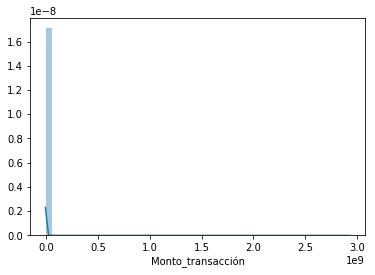

In [16]:
sns.distplot(df['Monto_transacción']);

(array([6.5514e+04, 6.0000e+00, 1.0000e+00, 5.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.00000000e+00, 2.92438320e+08, 5.84876639e+08, 8.77314959e+08,
        1.16975328e+09, 1.46219160e+09, 1.75462992e+09, 2.04706824e+09,
        2.33950656e+09, 2.63194488e+09, 2.92438320e+09]),
 <a list of 10 Patch objects>)

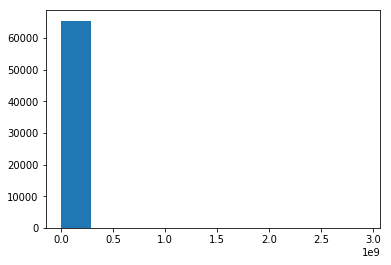

In [17]:
plt.hist(df['Monto_transacción'])

In [0]:
plt.scatter(x="Numero_de_cuenta", y="Monto_transacción", data=df)

In [0]:
df_cd = pd.merge(df_aperturas, df, how='inner', on = 'Numero_de_cuenta')

In [0]:
df_cd.head(5)


In [0]:
print(df_cd.shape)

In [0]:
cols_to_transform = [ 'Tipo_de_Instrumento',  'Tipo_de_Transacción', ]
df_with_dummies = pd.get_dummies(df_cd,columns = cols_to_transform )

In [0]:
df_with_dummies

In [0]:
sns.distplot(df_with_dummies['Tipo_de_Instrumento_Cuenta corriente']);

In [0]:
sns.barplot(x=df_with_dummies['Tipo_de_Instrumento_Cuenta corriente'],y=df_with_dummies['Tipo_de_Instrumento_Cuenta de ahorro']);

In [0]:
df_cd.info()
df_time = df_cd

In [0]:
#df_time['Fecha_Apertura'] =  pd.to_datetime(df_time['Fecha_Apertura'],
                             # format='%m/%d/%Y')
#df_time['Hora_transaccion'] =  pd.to_datetime(df_time['Hora_transaccion']).dt.strftime('%H:%M:%S')

In [0]:
df_time['Fecha Transaccion'] = pd.to_datetime(df_time['Fecha_Transaccion'] + ' ' + df_time['Hora_transaccion'])
df_time.info()

In [0]:
#df_time['Hora_transaccion'] = pd.to_datetime(df_time['Hora_transaccion']).dt.time

In [0]:
df_time

In [0]:
df_time = df_time.drop(columns=['Fecha_Transaccion','Hora_transaccion'])

In [0]:
df_time

In [0]:
df_time['Fecha_Apertura'] = pd.to_datetime(df_time['Fecha_Apertura'])

In [0]:
df_time.info()

In [0]:
df_time

In [0]:
cols_to_transform = [ 'Tipo_de_Instrumento',  'Tipo_de_Transacción', ]
df_time_wdummies = pd.get_dummies(df_time,columns = cols_to_transform )

In [0]:
df_time_wdummies

In [0]:
df_time_wdummies.info()

In [0]:
df_time_wdummies.isnull().any()

In [0]:
cuenta_corriente = df_time_wdummies['Tipo_de_Instrumento_Cuenta corriente'].sum()
cuenta_de_ahorro = df_time_wdummies['Tipo_de_Instrumento_Cuenta de ahorro'].sum()
deposito_cheques = df_time_wdummies['Tipo_de_Transacción_DCHQ'].sum()
deposito_efectivo = df_time_wdummies['Tipo_de_Transacción_DEFE'].sum()
retiro_cajero = df_time_wdummies['Tipo_de_Transacción_RECJ'].sum()
retiro_ventanilla = df_time_wdummies['Tipo_de_Transacción_REVN'].sum()

In [0]:
df_instrumentos = pd.DataFrame({'Instrumentos':['cuenta_corriente', 'cuenta_de_ahorro'], 'Cantidad':[cuenta_corriente, cuenta_de_ahorro]})
ax = df_instrumentos.plot.bar(x='Instrumentos', y='Cantidad', rot=0)

In [0]:
df_mvt = pd.DataFrame({'Movimientos':['dep cheques', 'dep efectivo','ret cajero','ret ventanilla'], 'Cantidad':[deposito_cheques,deposito_efectivo,retiro_cajero,retiro_ventanilla]})
ax = df_mvt.plot.bar(x='Movimientos', y='Cantidad', rot=0)